# Auswertung 200218_11

### imports

In [1]:
import sys
sys.path.append("../toolbox/")
from workflow  import *

In [2]:
%load_ext autoreload

In [3]:
%autoreload

## define master data

In [7]:
measurement_id = "200218_11"
campaign_id    = "02_Verifikation_1"
path_to_raw_data_folder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
path_to_hdf5_folder = "HDF5"

In [8]:
rawfolder, hdf5file = paths(measurement_id, campaign_id, path_to_raw_data_folder, path_to_hdf5_folder)

### import data

In [9]:
traceName = "Trace"
pulseMin = None
pulseMax = None


C1 = readChannel("C1", rawfolder, traceName, pulseMin, pulseMax)
C3 = readChannel("C3", rawfolder, traceName, pulseMin, pulseMax)

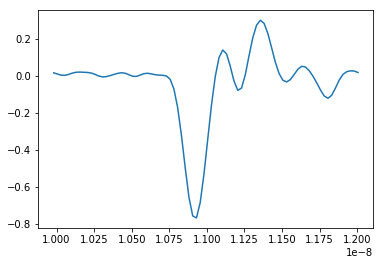

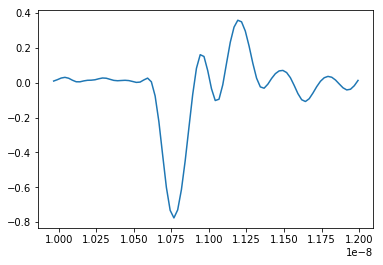

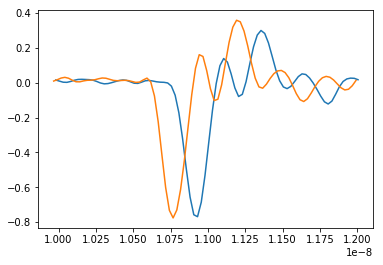

In [10]:
pulsnr = 123
viewImport(C1, C3, pulsnr)

### define area of interest

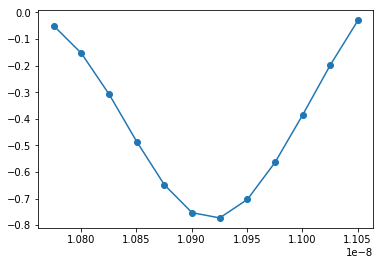

In [16]:
areaMinC1 = 32
areaMaxC1 = 44
pulsnr = 125

viewSelection(C1, pulsnr, areaMinC1, areaMaxC1)

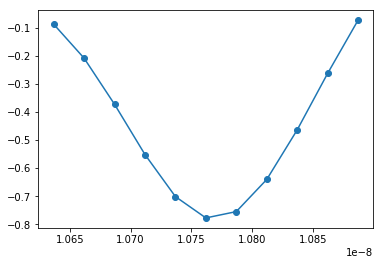

In [21]:
areaMinC3 = 27
areaMaxC3 = 38
pulsnr = 125

viewSelection(C3, pulsnr, areaMinC3, areaMaxC3)

## algorithm 1: fit gaussian function

In [23]:
# [A, mu, sigma]
gaussParamsC1 = [-1.5e-11, 1.09e-8, 5e-11]
gaussParamsC3 = [-1.0e-11, 1.07e-8, 5e-11]

In [24]:
C1["fit"] = fitChannel(C1["data"], areaMinC1, areaMaxC1, gaussParamsC1)

In [25]:
C3["fit"] = fitChannel(C3["data"], areaMinC3, areaMaxC3, gaussParamsC3)

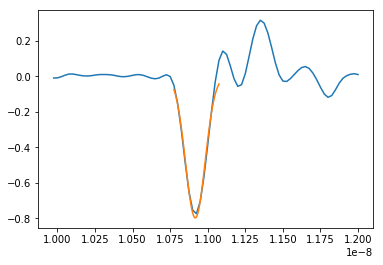

parameter: [-1.30287252e-10  1.09177249e-08  6.52208028e-11] [A, mu, sigma]


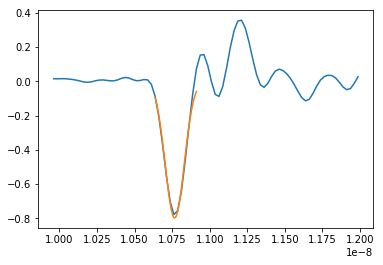

parameter: [-1.26842607e-10  1.07670722e-08  6.34721172e-11] [A, mu, sigma]


In [26]:
pulsnr = 125

viewFit(C1, pulsnr, areaMinC1, areaMaxC1, gaussParamsC1)
viewFit(C3, pulsnr, areaMinC3, areaMaxC3, gaussParamsC3)

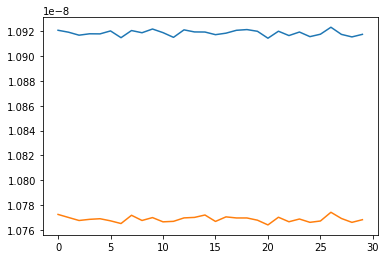

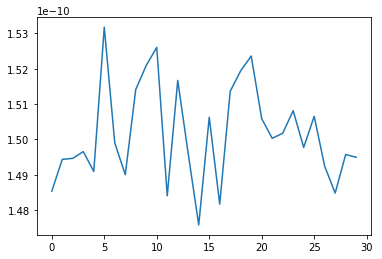

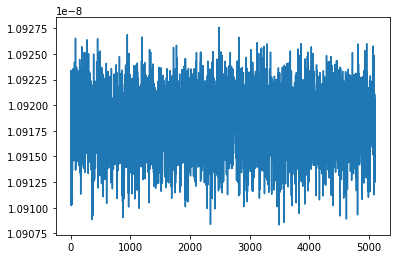

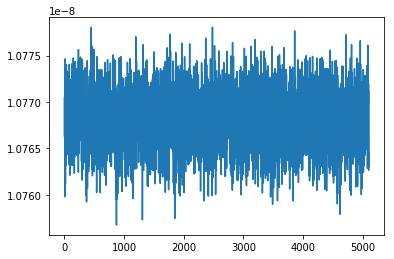

In [27]:
pulseMin = 100
pulseMax = 130

viewMu(C1, C3, pulseMin, pulseMax)

### histogram

In [28]:
JitterGauss = jitter(C1, C3, axis = 1)

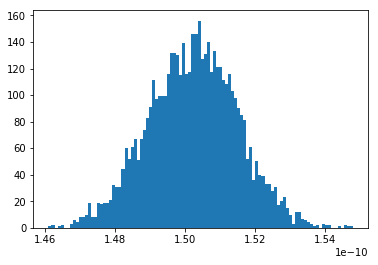

In [29]:
bins = 100

HistGauss = histogram(JitterGauss, bins)

### fit gauss to histogram

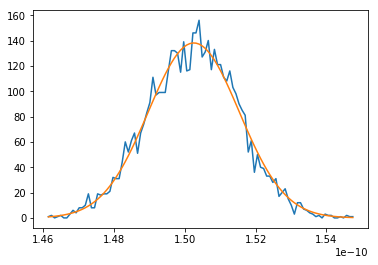

parameter: [4.45198215e-10 1.50250248e-10 1.28614273e-12] [A, mu, sigma]


In [31]:
# [A, mu, sigma]
gaussParamsHist = [1e-9, 1.5e-10, 1e-12]

HistFitParamsGauss = fitSingle(np.array([HistGauss[0], HistGauss[1]]), None, None, gaussParamsHist)

### result GAUSSFIT

In [32]:
DoubleJitter, SingleJitter, Mu = result(HistFitParamsGauss)

σ_0: 1.2861427348094223 ps
σ_1: 0.909440249357554 ps
σ_1 = σ_0 / sqrt(2)

μ: 150.25024820832923 ps

coma separated [σ_0, σ_1, μ]
1.2861427348094224e-12,9.09440249357554e-13,1.5025024820832922e-10

 tab separated [σ_0, σ_1, μ]
1.2861427348094224e-12	9.09440249357554e-13	1.5025024820832922e-10


## algorithm 2: min

In [33]:
C1["min"] = minChannel(C1)
C3["min"] = minChannel(C3)

## algorithm 3: threshold

In [34]:
factor = 0.5

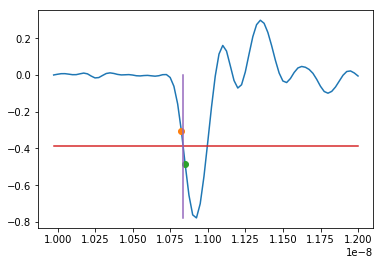

xt: 1.0835126111908474e-08 ps, yt -0.3888763835420832 ps


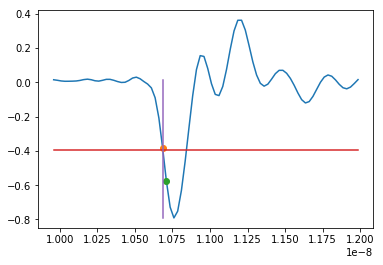

xt: 1.0686639901090716e-08 ps, yt -0.39545154543884564 ps


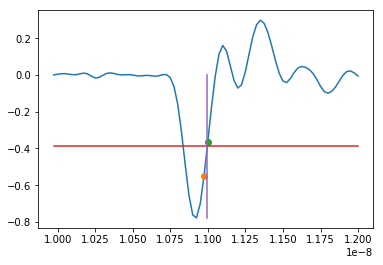

xt: 1.0995661804502974e-08 ps, yt -0.3888763835420832 ps


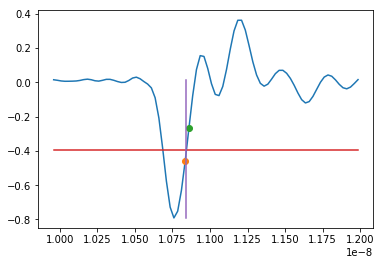

xt: 1.0843325016085367e-08 ps, yt -0.39545154543884564 ps


In [35]:
C1["thres5f"] = threshold(C1, factor, show=120)
C3["thres5f"] = threshold(C3, factor, show=120)
C1["thres5r"] = threshold(C1, factor, fallingEdge = False, show=120)
C3["thres5r"] = threshold(C3, factor, fallingEdge = False, show=120)

In [36]:
C1["thres5c"] = (C1["thres5r"] + C1["thres5f"]) / 2
C3["thres5c"] = (C3["thres5r"] + C3["thres5f"]) / 2

### histogram

In [37]:
JitterThres5f = jitter(C1, C3, storage = "thres5f", axis = 0)
JitterThres5c = jitter(C1, C3, storage = "thres5c", axis = 0)
JitterThres5r = jitter(C1, C3, storage = "thres5r", axis = 0)

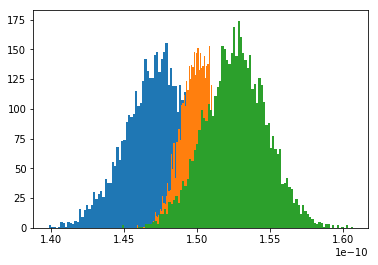

In [38]:
bins = 100

HistThres5f = histogram(JitterThres5f, bins)
HistThres5c = histogram(JitterThres5c, bins)
HistThres5r = histogram(JitterThres5r, bins)

### fit gauss to histogram

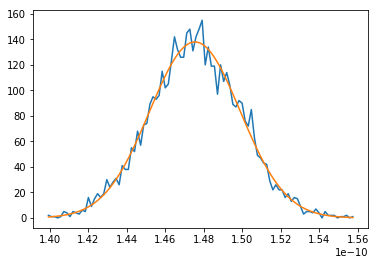

parameter: [8.14148771e-10 1.47533760e-10 2.35323861e-12] [A, mu, sigma]


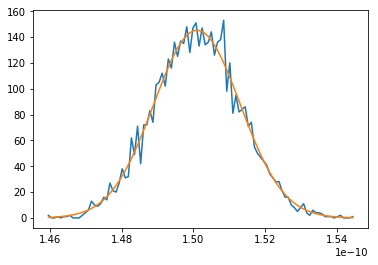

parameter: [4.38813128e-10 1.50097417e-10 1.20511656e-12] [A, mu, sigma]


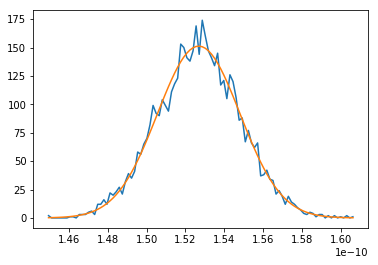

parameter: [8.04478337e-10 1.52683134e-10 2.12241826e-12] [A, mu, sigma]


In [39]:
# [A, mu, sigma]
gaussParamsThres5f = [1e-9, 1.47e-10, 1e-12]
gaussParamsThres5c = [1e-9, 1.5e-10, 1e-12]
gaussParamsThres5r = [1e-9, 1.53e-10, 1e-12]

HistFitParamsThres5f = fitSingle(np.array([HistThres5f[0], HistThres5f[1]]), None, None, gaussParamsThres5f)
HistFitParamsThres5c = fitSingle(np.array([HistThres5c[0], HistThres5c[1]]), None, None, gaussParamsThres5c)
HistFitParamsThres5r = fitSingle(np.array([HistThres5r[0], HistThres5r[1]]), None, None, gaussParamsThres5r)

### result

In [40]:
print("-- THRESHOLD 50% FALLING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5f)

print("\n--------------------------\n\n-- THRESHOLD 50% CENTER --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5c)

print("\n-------------------------------\n\n-- THRESHOLD 50% RISING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5r)

-- THRESHOLD 50% FALLING EDGE --
σ_0: 2.3532386115794206 ps
σ_1: 1.663990979997824 ps
σ_1 = σ_0 / sqrt(2)

μ: 147.53376010680313 ps

coma separated [σ_0, σ_1, μ]
2.3532386115794205e-12,1.663990979997824e-12,1.4753376010680314e-10

 tab separated [σ_0, σ_1, μ]
2.3532386115794205e-12	1.663990979997824e-12	1.4753376010680314e-10

--------------------------

-- THRESHOLD 50% CENTER --
σ_0: 1.2051165631199903 ps
σ_1: 0.8521460939023711 ps
σ_1 = σ_0 / sqrt(2)

μ: 150.0974172127928 ps

coma separated [σ_0, σ_1, μ]
1.2051165631199903e-12,8.521460939023711e-13,1.500974172127928e-10

 tab separated [σ_0, σ_1, μ]
1.2051165631199903e-12	8.521460939023711e-13	1.500974172127928e-10

-------------------------------

-- THRESHOLD 50% RISING EDGE --
σ_0: 2.1224182591175267 ps
σ_1: 1.50077634353615 ps
σ_1 = σ_0 / sqrt(2)

μ: 152.68313413055844 ps

coma separated [σ_0, σ_1, μ]
2.1224182591175268e-12,1.50077634353615e-12,1.5268313413055844e-10

 tab separated [σ_0, σ_1, μ]
2.1224182591175268e-12	1.5007763